
# STEP 1: Data Engineering - Prepare instruction tuning dataset

In [1]:
!pip install datasets pandas matplotlib seaborn transformers accelerate peft bitsandbytes --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00


In [23]:
!pip install --upgrade numpy datasets transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 13.3.0 requires num

In [1]:
import pandas as pd
from datasets import Dataset, DatasetDict
import matplotlib.pyplot as plt
import seaborn as sns
import random
import textwrap

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugodarwood/epirecipes")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/epirecipes


In [3]:

# Load dataset from KaggleHub path
csv_path = "/root/.cache/kagglehub/datasets/hugodarwood/epirecipes/versions/2/epi_r.csv"
df = pd.read_csv(csv_path)



In [4]:
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
meta_cols = ["title", "rating", "calories", "protein", "fat", "sodium"]
tag_cols = [col for col in df.columns if col not in meta_cols]

df = df.dropna(subset=meta_cols)
def extract_tags(row):
    return [tag for tag in tag_cols if row[tag] == 1]
df["tags"] = df.apply(extract_tags, axis=1)
df = df[df["tags"].map(len) > 0].reset_index(drop=True)


/tmp/ipython-input-5-3179303263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tags"] = df.apply(extract_tags, axis=1)


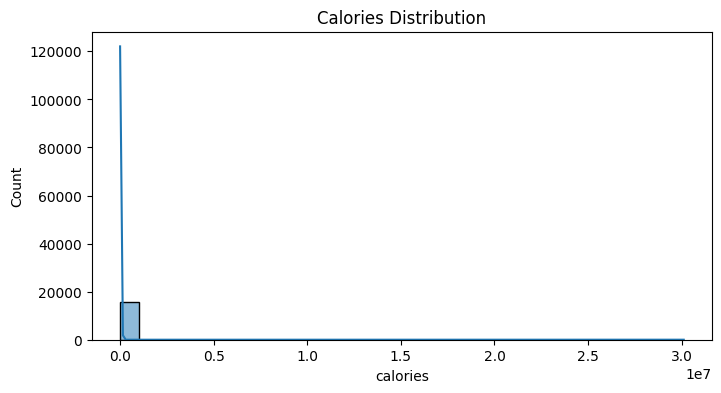

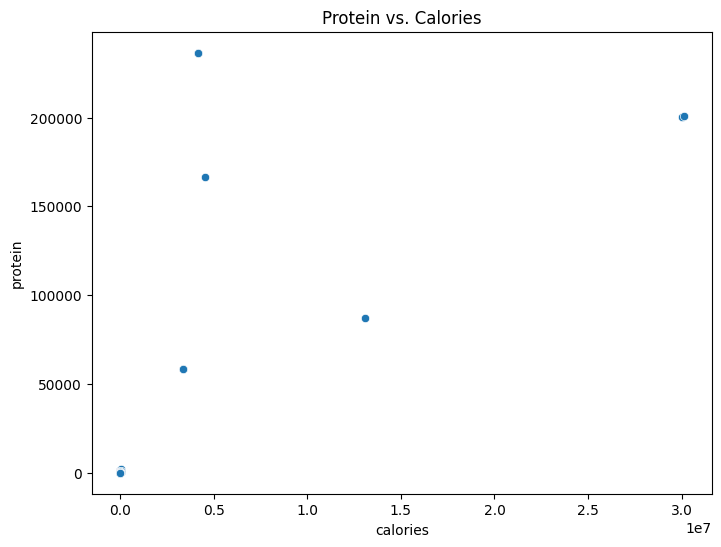

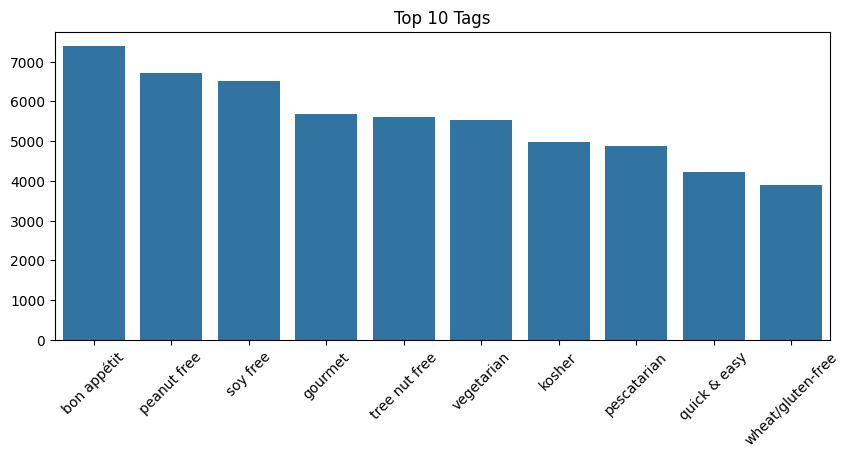

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df["calories"], bins=30, kde=True)
plt.title("Calories Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x="calories", y="protein", data=df)
plt.title("Protein vs. Calories")
plt.show()

from collections import Counter
all_tags = [tag for tags in df["tags"] for tag in tags]
top_tags = Counter(all_tags).most_common(10)
tags, counts = zip(*top_tags)
plt.figure(figsize=(10,4))
sns.barplot(x=list(tags), y=list(counts))
plt.title("Top 10 Tags")
plt.xticks(rotation=45)
plt.show()


In [7]:
def build_instruction(row):
    tag_string = ", ".join(row['tags'][:3])
    return f"Recommend a {tag_string} meal with less than {int(row['calories']) + 50} calories and high protein"

def build_response(row):
    return f"{row['title']} – {int(row['calories'])} cal, {int(row['protein'])}g protein, {int(row['fat'])}g fat, {int(row['sodium'])}mg sodium"

df["instruction"] = df.apply(build_instruction, axis=1)
df["response"] = df.apply(build_response, axis=1)
df["text"] = df["instruction"] + "\n" + df["response"]


In [8]:
from datasets import Dataset, DatasetDict
df_small = df.sample(2060, random_state=42).reset_index(drop=True)
df = df_small.sample(frac=1, random_state=42).reset_index(drop=True)
train_size = int(0.8 * len(df))
val_size = int(0.1 * len(df))

train_df = df[:train_size]
val_df = df[train_size:train_size+val_size]
test_df = df[train_size+val_size:]

dataset_dict = DatasetDict({
    "train": Dataset.from_pandas(train_df[["instruction", "response", "text"]], preserve_index=False),
    "validation": Dataset.from_pandas(val_df[["instruction", "response", "text"]], preserve_index=False),
    "test": Dataset.from_pandas(test_df[["instruction", "response", "text"]], preserve_index=False),
})


In [9]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['instruction', 'response', 'text'],
        num_rows: 1648
    })
    validation: Dataset({
        features: ['instruction', 'response', 'text'],
        num_rows: 206
    })
    test: Dataset({
        features: ['instruction', 'response', 'text'],
        num_rows: 206
    })
})

In [10]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Required for GPT-2

def tokenize_function(example):
    return tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=128,
    )

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

def format_for_trainer(example):
    return {
        "input_ids": example["input_ids"],
        "attention_mask": example["attention_mask"],
        "labels": example["input_ids"]
    }

tokenized_datasets = tokenized_datasets.map(format_for_trainer, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(
    [col for col in tokenized_datasets["train"].column_names if col not in ["input_ids", "attention_mask", "labels"]]
)
tokenized_datasets.set_format(type="torch")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/1648 [00:00<?, ? examples/s]

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

Map:   0%|          | 0/1648 [00:00<?, ? examples/s]

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

Map:   0%|          | 0/206 [00:00<?, ? examples/s]

In [11]:
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer
from peft import LoraConfig, get_peft_model, TaskType

model = AutoModelForCausalLM.from_pretrained("gpt2")
lora_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["c_attn", "c_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)
model = get_peft_model(model, lora_config)


/usr/local/lib/python3.11/dist-packages/peft/tuners/lora/layer.py:1768: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


In [12]:
training_args = TrainingArguments(
    output_dir="./lora-gpt2",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    eval_strategy="steps",
    eval_steps=100,
    save_steps=200,
    logging_steps=50,
    learning_rate=2e-4,
    fp16=True,  # If your GPU supports it
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
)


/tmp/ipython-input-12-2332385764.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [13]:
trainer.train()


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss
100,0.895400,0.712532
200,0.689000,0.639537
300,0.659500,0.614583
400,0.659500,0.601786
500,0.634400,0.591641
600,0.620900,0.584201
700,0.606900,0.578770
800,0.600000,0.575597
900,0.601900,0.571621
1000,0.610100,0.570572


TrainOutput(global_step=1236, training_loss=0.7080085161820199, metrics={'train_runtime': 126.0821, 'train_samples_per_second': 39.213, 'train_steps_per_second': 9.803, 'total_flos': 326036342439936.0, 'train_loss': 0.7080085161820199, 'epoch': 3.0})

In [14]:
results = trainer.evaluate(tokenized_datasets["test"])
print("Test set evaluation:", results)


Test set evaluation: {'eval_loss': 0.5948965549468994, 'eval_runtime': 1.6968, 'eval_samples_per_second': 121.403, 'eval_steps_per_second': 30.645, 'epoch': 3.0}


In [15]:
model.save_pretrained("./lora-gpt2-adapter")
tokenizer.save_pretrained("./lora-gpt2-adapter")


('./lora-gpt2-adapter/tokenizer_config.json',
 './lora-gpt2-adapter/special_tokens_map.json',
 './lora-gpt2-adapter/vocab.json',
 './lora-gpt2-adapter/merges.txt',
 './lora-gpt2-adapter/added_tokens.json',
 './lora-gpt2-adapter/tokenizer.json')

In [29]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

base_model = AutoModelForCausalLM.from_pretrained("gpt2")
model = PeftModel.from_pretrained(base_model, "./lora-gpt2-adapter")
tokenizer = AutoTokenizer.from_pretrained("./lora-gpt2-adapter")

prompt = "Recommend a potato soup dish with calories below 200"
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(
    **inputs,
    max_new_tokens=50,
    do_sample=True,
    top_p=0.95,
    temperature=0.1,
    repetition_penalty=1.2
)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Recommend a potato soup dish with calories below 200, high protein and low fat
Potato Soup  – 150 cal, 1g protein, 0mg sodium


In [19]:
import pandas as pd
from tqdm import tqdm

def generate_outputs(test_df, model, tokenizer, max_new_tokens=50):
    model_outputs = []
    for instr in tqdm(test_df['instruction']):
        inputs = tokenizer(instr, return_tensors="pt")
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            top_p=0.95,
            temperature=0.7,
            repetition_penalty=1.2
        )
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)
        model_outputs.append(response)
    test_df['model_output'] = model_outputs
    return test_df

test_df = generate_outputs(test_df, model, tokenizer)


100%|██████████| 206/206 [05:32<00:00,  1.62s/it]
/tmp/ipython-input-19-1244785641.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['model_output'] = model_outputs


In [31]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=6edc5472cf14d6406bc08b66e5752ba6543fab153035004e7fd5b7798712ae58
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [32]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def compute_bleu_rouge(test_df):
    bleu_scores = []
    rouge_l_scores = []
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    smooth = SmoothingFunction().method1

    for ref, pred in zip(test_df['response'], test_df['model_output']):
        ref_tokens = ref.split()
        pred_tokens = pred.split()
        bleu = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smooth)
        bleu_scores.append(bleu)
        rouge = scorer.score(ref, pred)
        rouge_l_scores.append(rouge['rougeL'].fmeasure)

    test_df['bleu'] = bleu_scores
    test_df['rougeL'] = rouge_l_scores
    print(f"Average BLEU: {sum(bleu_scores)/len(bleu_scores):.3f}")
    print(f"Average ROUGE-L: {sum(rouge_l_scores)/len(rouge_l_scores):.3f}")

compute_bleu_rouge(test_df)


Average BLEU: 0.012
Average ROUGE-L: 0.247


/tmp/ipython-input-32-2559213520.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['bleu'] = bleu_scores
/tmp/ipython-input-32-2559213520.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rougeL'] = rouge_l_scores
